## Import libraries

In [13]:
import numpy as np
import sklearn
import sklearn.datasets
from scipy.spatial.distance import pdist, squareform
from pacBayesianDendogramCut import DendrogramCut
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
display(HTML("<style>.container { width:90% !important; }</style>"))

## Generate dataset for clustering

In [14]:
centers = np.asarray([[-6.8, -7.3], [5, 2.5], [5, -2.5]])
samples = np.asarray([4, 1, 1]) * 50

X, Z, C = sklearn.datasets.make_blobs(
    samples,
    cluster_std=[2, 1, 1],
    centers=centers,
    return_centers=True)
dist = pdist(X)
dist = squareform(dist)

## Plot the generated dataset

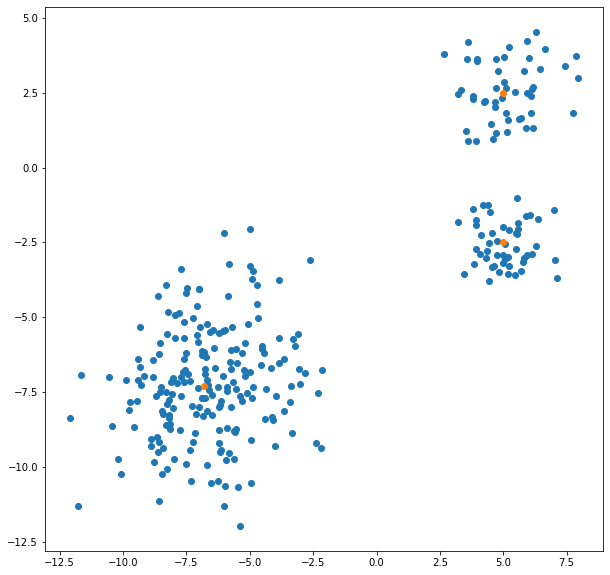

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1])
ax.scatter(C[:, 0], C[:, 1])
fig.show()

## Compute the dynamic cut with the pacBayesian algorithm and plot the results

In [18]:
model = DendrogramCut(k_max=10, method='average').fit(dist)
k = model.pac_bayesian_cut(lambda_=0.2)
print(k)
model.dendrogram_plot(k=k)

from IPython.display import Image

4
